In [1]:
# 기본 라이브러리
import pandas as pd
import numpy as np
import warnings

# 시각화 관련
import seaborn as sns
import matplotlib.pyplot as plt

# 통계 및 데이터 분석 관련
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor


# 사이킷런 - 데이터 전처리
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 사이킷런 - 피처 선택
from sklearn.feature_selection import SelectFromModel, mutual_info_classif, f_classif

# 사이킷런 - 모델링 및 평가
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# 사이킷런 - 모델 평가 및 선택
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, make_scorer
from sklearn.model_selection import cross_val_score, GridSearchCV

# 불균형 데이터 처리
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN
from imblearn.combine import SMOTEENN, SMOTETomek
from collections import Counter

# 경고 메시지 무시 설정
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_excel("tw_bank_train.xlsx")
test = pd.read_excel("tw_bank_test.xlsx")

In [3]:
train.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0,0.461561,0.517281,0.524439,0.606120,0.606134,0.999035,0.797237,0.809222,0.303120,...,0.784652,0.004896,0.623163,0.606120,0.839083,0.280279,0.026551,0.563676,1,0.027524
1,0,0.511724,0.571740,0.568928,0.612808,0.612592,0.999097,0.797564,0.809480,0.303562,...,0.817036,0.002724,0.623946,0.612805,0.841964,0.281213,0.026872,0.565518,1,0.025053
2,0,0.691513,0.764719,0.763745,0.615777,0.615777,0.999191,0.797662,0.809570,0.303536,...,0.879404,0.000423,0.624151,0.615773,0.846032,0.278413,0.026792,0.565162,1,0.036169
3,0,0.512456,0.571140,0.570266,0.608541,0.608541,0.999070,0.797497,0.809419,0.303500,...,0.815018,0.001126,0.623373,0.608541,0.841648,0.280219,0.027090,0.566269,1,0.027713
4,0,0.544874,0.624618,0.605225,0.613226,0.613226,0.999167,0.797685,0.809594,0.303627,...,0.831694,0.000785,0.622839,0.613223,0.843249,0.281002,0.026797,0.565184,1,0.025546


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4773 entries, 0 to 4772
Data columns (total 96 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Bankrupt?                                                4773 non-null   int64  
 1   ROA(C) before interest and depreciation before interest  4773 non-null   float64
 2   ROA(A) before interest and % after tax                   4773 non-null   float64
 3   ROA(B) before interest and depreciation after tax        4773 non-null   float64
 4   Operating Gross Margin                                   4773 non-null   float64
 5   Realized Sales Gross Margin                              4773 non-null   float64
 6   Operating Profit Rate                                    4773 non-null   float64
 7   Pre-tax net Interest Rate                                4773 non-null   float64
 8   After-tax net Interest Rate 

In [5]:
train.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,4773.000000,4773.000000,4773.000000,4773.000000,4773.000000,4773.000000,4773.000000,4773.000000,4773.000000,4773.000000,...,4773.000000,4.773000e+03,4773.000000,4773.000000,4773.000000,4773.000000,4773.000000,4773.000000,4773.0,4773.000000
mean,0.030798,0.506028,0.559393,0.554399,0.607896,0.607874,0.998670,0.797131,0.809021,0.303699,...,0.808205,2.295621e+07,0.623958,0.607894,0.840372,0.280227,0.027652,0.565635,1.0,0.047618
std,0.172789,0.060701,0.066065,0.061520,0.016135,0.016112,0.015533,0.015111,0.016008,0.012651,...,0.040444,4.139559e+08,0.013872,0.016135,0.015615,0.011636,0.017959,0.010444,0.0,0.047874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.198632,1.0,0.000000
25%,0.000000,0.476625,0.535706,0.527330,0.600499,0.600499,0.998970,0.797387,0.809312,0.303468,...,0.796847,8.863775e-04,0.623640,0.600495,0.840114,0.276908,0.026791,0.565158,1.0,0.024581
50%,0.000000,0.502706,0.559693,0.552385,0.605990,0.605954,0.999023,0.797466,0.809377,0.303526,...,0.810722,2.037813e-03,0.623886,0.605987,0.841168,0.278719,0.026808,0.565250,1.0,0.034185
75%,0.000000,0.535953,0.589893,0.584774,0.613947,0.613932,0.999094,0.797579,0.809470,0.303586,...,0.826796,5.195323e-03,0.624179,0.613945,0.842381,0.281412,0.026914,0.565729,1.0,0.053676
max,1.000000,1.000000,1.000000,1.000000,0.665151,0.666023,0.999778,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,0.665149,0.976180,0.745352,1.000000,1.000000,1.0,1.000000


In [6]:
train.isnull().sum()

Bankrupt?                                                  0
ROA(C) before interest and depreciation before interest    0
ROA(A) before interest and % after tax                     0
ROA(B) before interest and depreciation after tax          0
Operating Gross Margin                                     0
                                                          ..
Liability to Equity                                        0
Degree of Financial Leverage (DFL)                         0
Interest Coverage Ratio (Interest expense to EBIT)         0
Net Income Flag                                            0
Equity to Liability                                        0
Length: 96, dtype: int64

In [7]:
train_y = train.iloc[:,:-95]
train_x = train.iloc[:,1:]

변수 선택

일변량 통계 기반 변수 선택

In [42]:
from sklearn.feature_selection import SelectKBest, f_classif

# SelectKBest 클래스를 적용하여 상위 k개의 특성 추출
bestfeatures = SelectKBest(score_func=f_classif, k=20)  # 원하는 특성의 수로 k를 변경할 수 있습니다
fit = bestfeatures.fit(train_x, train_y)

# 각 특성에 대한 점수 가져오기
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(train_x.columns)

# 두 데이터프레임을 연결하여 시각화하기 좋게 만들고 출력
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']  # 데이터프레임 열 이름 지정
print(featureScores.nlargest(20, 'Score'))  # 상위 10개의 최고 특성 출력


                                              Feature       Score
85                         Net Income to Total Assets  392.325069
1              ROA(A) before interest and % after tax  317.524381
2   ROA(B) before interest and depreciation after tax  306.811128
0   ROA(C) before interest and depreciation before...  269.959983
37                                   Net worth/Assets  260.655007
36                                       Debt ratio %  260.655007
64                             Working Capital/Equity  215.198466
39                               Borrowing dependency  192.792755
18            Persistent EPS in the Last Four Seasons  180.802318
90                                Liability to Equity  180.416807
67                  Retained Earnings to Total Assets  179.262171
89                 Net Income to Stockholder's Equity  173.740174
53                    Working Capital to Total Assets  172.706890
83                Current Liability to Current Assets  160.092089
59        

모델 기반 변수 선택

In [47]:
# 랜덤 포레스트 분류기를 데이터에 적합시킴
clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(train_x, train_y)

# 중요도에 기반하여 특성을 선택
model = SelectFromModel(clf, prefit=True)

# 선택된 특성들 확인
selected_features = train_x.columns[(model.get_support())]

# 모든 특성에 대한 중요도를 가져옴
feature_importances = clf.feature_importances_

# 선택된 특성들의 중요도만 필터링하여 데이터프레임 생성
selected_features_importances = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importances[model.get_support()]
}).sort_values(by='Importance', ascending=False)

# 선택된 특성들과 그들의 중요도 출력
print(selected_features_importances)

                                              Feature  Importance
37                 Net Income to Stockholder's Equity    0.024945
11                              Net Value Growth Rate    0.024405
25                                  Cash/Total Assets    0.022925
17                               Borrowing dependency    0.022399
9             Persistent EPS in the Last Four Seasons    0.019622
40  Interest Coverage Ratio (Interest expense to E...    0.019165
36                                 No-credit Interval    0.018826
8                             Net Value Per Share (C)    0.018808
39                 Degree of Financial Leverage (DFL)    0.018426
15                                       Debt ratio %    0.016689
0   ROA(C) before interest and depreciation before...    0.015750
27                          Inventory/Working Capital    0.015537
4                Continuous interest rate (after tax)    0.015353
34                         Net Income to Total Assets    0.015220
13        

반복적 변수 선택

In [8]:
from sklearn.feature_selection import RFE

# 데이터에 적합시킬 랜덤 포레스트 분류기 생성
clf = RandomForestClassifier(n_estimators=100)

# RFE 모델 생성 및 피팅. 여기서는 선택할 특성의 수를 n_features_to_select로 설정
rfe = RFE(estimator=clf, n_features_to_select=20, step=1)  # 20개의 특성을 선택하도록 설정
rfe = rfe.fit(train_x, train_y)

# RFE를 통해 선택된 특성 확인
selected_features = train_x.columns[rfe.support_]

# 선택된 특성들 출력
print("Selected Features: ")
print(selected_features)

# 선택된 특성들의 순위 출력
feature_ranking = pd.DataFrame({'Feature': train_x.columns, 'Ranking': rfe.ranking_})
print("Feature Ranking: ")
print(feature_ranking.sort_values(by='Ranking'))

Selected Features: 
Index(['ROA(B) before interest and depreciation after tax',
       'Non-industry income and expenditure/revenue',
       'Interest-bearing debt interest rate', 'Net Value Per Share (B)',
       'Net Value Per Share (C)', 'Persistent EPS in the Last Four Seasons',
       'Net Value Growth Rate', 'Quick Ratio', 'Interest Expense Ratio',
       'Total debt/Total net worth', 'Net worth/Assets',
       'Borrowing dependency', 'Inventory Turnover Rate (times)',
       'Cash/Total Assets', 'Cash/Current Liability', 'Working Capital/Equity',
       'No-credit Interval', 'Net Income to Stockholder's Equity',
       'Degree of Financial Leverage (DFL)',
       'Interest Coverage Ratio (Interest expense to EBIT)'],
      dtype='object')
Feature Ranking: 
                                  Feature  Ranking
47        Inventory Turnover Rate (times)        1
35             Total debt/Total net worth        1
37                       Net worth/Assets        1
29                  Ne

In [9]:
selected_features

Index(['ROA(B) before interest and depreciation after tax',
       'Non-industry income and expenditure/revenue',
       'Interest-bearing debt interest rate', 'Net Value Per Share (B)',
       'Net Value Per Share (C)', 'Persistent EPS in the Last Four Seasons',
       'Net Value Growth Rate', 'Quick Ratio', 'Interest Expense Ratio',
       'Total debt/Total net worth', 'Net worth/Assets',
       'Borrowing dependency', 'Inventory Turnover Rate (times)',
       'Cash/Total Assets', 'Cash/Current Liability', 'Working Capital/Equity',
       'No-credit Interval', 'Net Income to Stockholder's Equity',
       'Degree of Financial Leverage (DFL)',
       'Interest Coverage Ratio (Interest expense to EBIT)'],
      dtype='object')

In [10]:
train_x = train_x[selected_features]

In [11]:
train_x

,ROA(B) before interest and depreciation after tax,Non-industry income and expenditure/revenue,Interest-bearing debt interest rate,Net Value Per Share (B),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Net Value Growth Rate,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Net worth/Assets,Borrowing dependency,Inventory Turnover Rate (times),Cash/Total Assets,Cash/Current Liability,Working Capital/Equity,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT)
0,0.524439,0.303120,0.000314,0.204500,0.204500,0.212820,0.000420,0.003096,0.628912,0.007584,0.865828,0.377330,5.790000e+09,0.057606,0.002667,0.731654,0.623163,0.839083,0.026551,0.563676
1,0.568928,0.303562,0.000220,0.180060,0.180439,0.229933,0.000472,0.007315,0.630925,0.008871,0.854189,0.377240,8.730000e+09,0.030548,0.002346,0.734898,0.623946,0.841964,0.026872,0.565518
2,0.763745,0.303536,0.000000,0.197000,0.197000,0.279947,0.001441,0.009013,0.630614,0.005011,0.895365,0.369637,1.994802e-04,0.270602,0.013140,0.740359,0.624151,0.846032,0.026792,0.565162
3,0.570266,0.303500,0.000638,0.179259,0.179259,0.228798,0.000443,0.004021,0.631451,0.007501,0.866644,0.376712,5.520000e+09,0.078625,0.003636,0.733102,0.623373,0.841648,0.027090,0.566269
4,0.605225,0.303627,0.000183,0.178079,0.178079,0.240144,0.001686,0.000299,0.630682,0.008581,0.856668,0.371884,1.410000e+09,0.005879,0.000263,0.742085,0.622839,0.843249,0.026797,0.565184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4768,0.590128,0.303673,0.000441,0.222115,0.222115,0.267373,0.000652,0.006194,0.630798,0.012201,0.830577,0.371809,2.109446e-04,0.059788,0.001982,0.734927,0.624459,0.843582,0.026840,0.565379
4769,0.555008,0.303509,0.000764,0.176647,0.176647,0.221707,0.000462,0.019270,0.630783,0.001390,0.961091,0.370011,8.980000e+09,0.199298,0.024582,0.742170,0.624191,0.841009,0.026855,0.565445
4770,0.528669,0.303448,0.000363,0.225612,0.225612,0.234376,0.000437,0.000311,0.631598,0.028905,0.774345,0.383166,6.110000e+08,0.036897,0.000971,0.734684,0.618521,0.841322,0.027020,0.566055
4771,0.682103,0.303469,0.000340,0.269015,0.269015,0.320223,0.000497,0.009930,0.630878,0.009255,0.851045,0.378235,4.925863e-04,0.105812,0.009118,0.735149,0.623610,0.844513,0.026864,0.565482


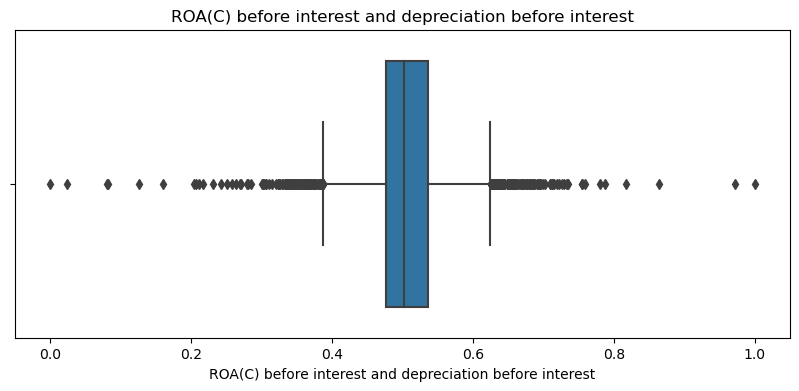

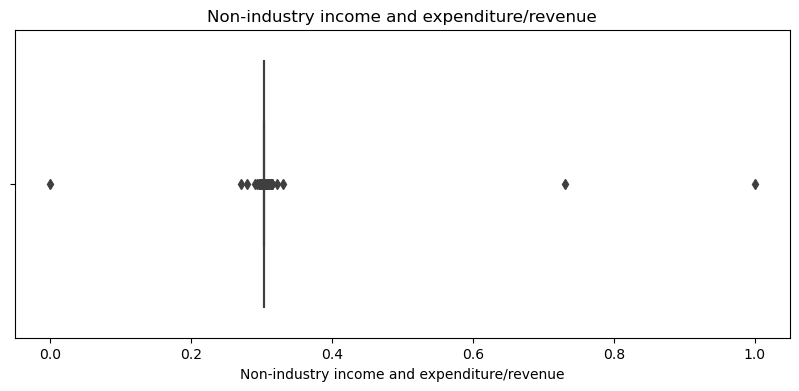

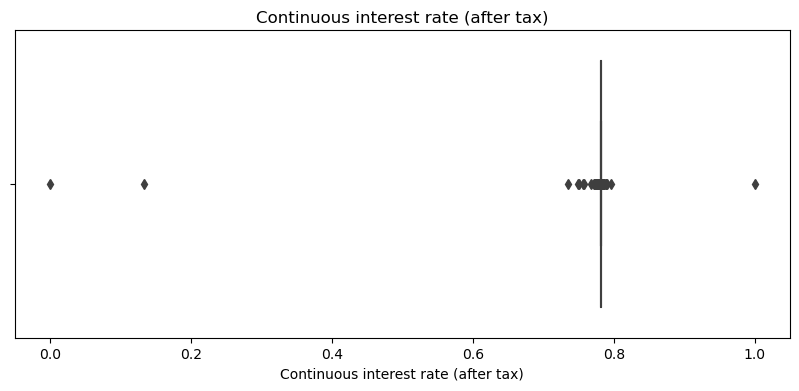

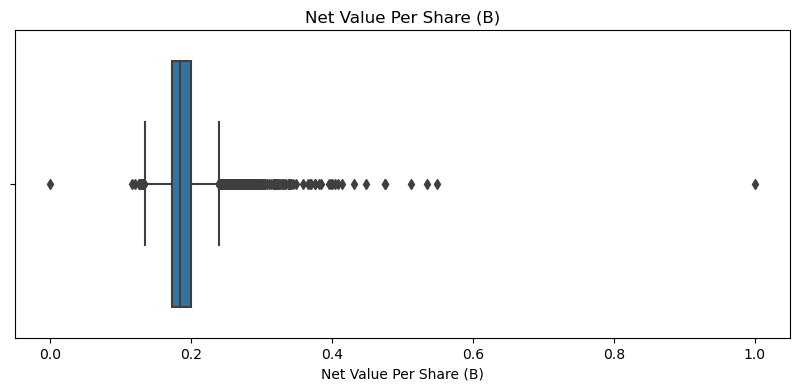

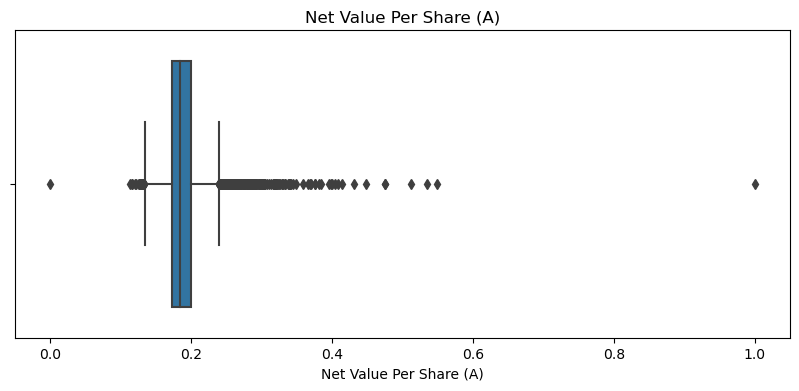

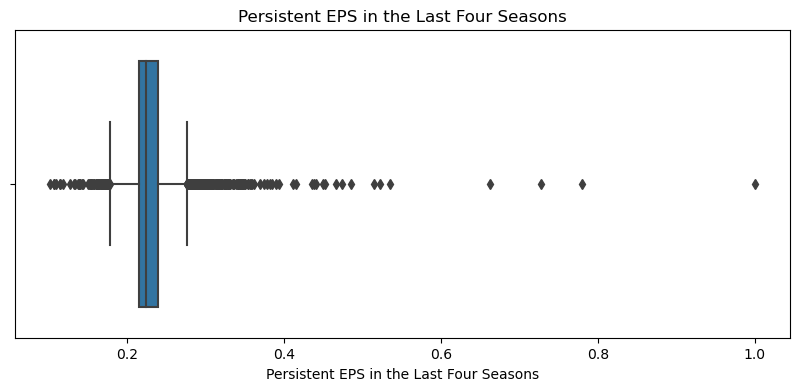

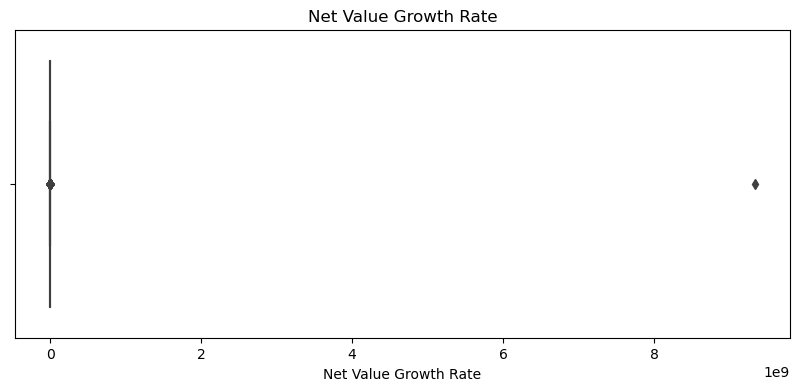

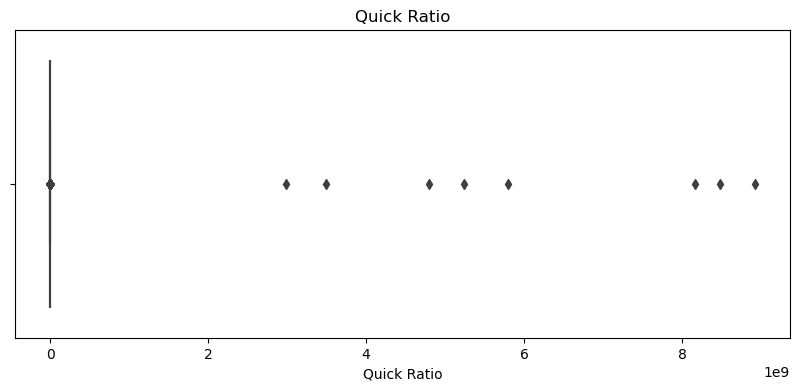

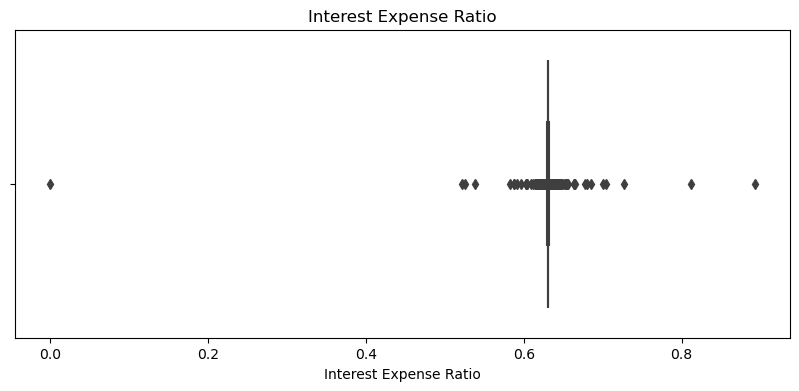

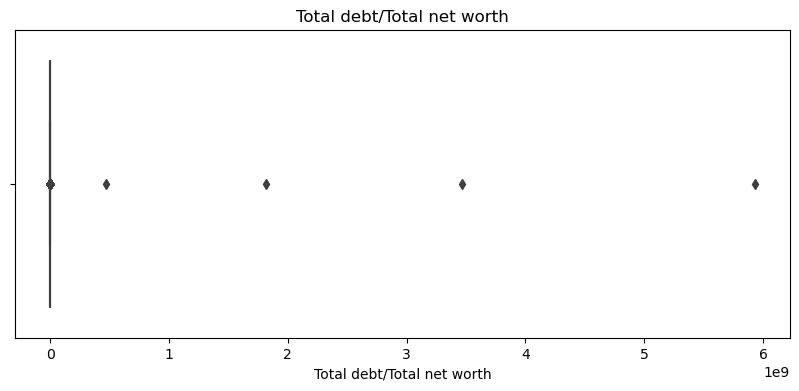

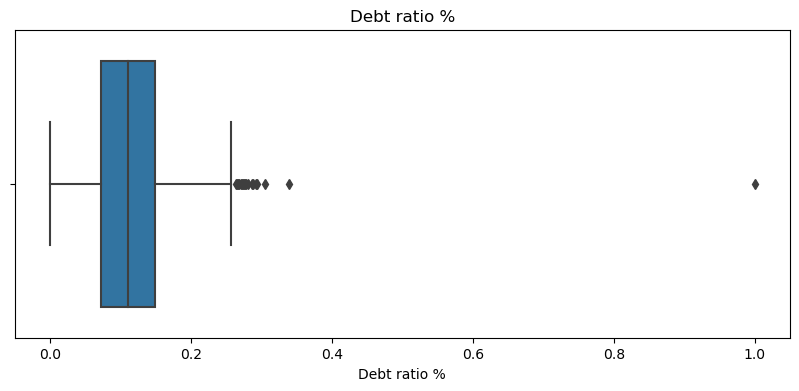

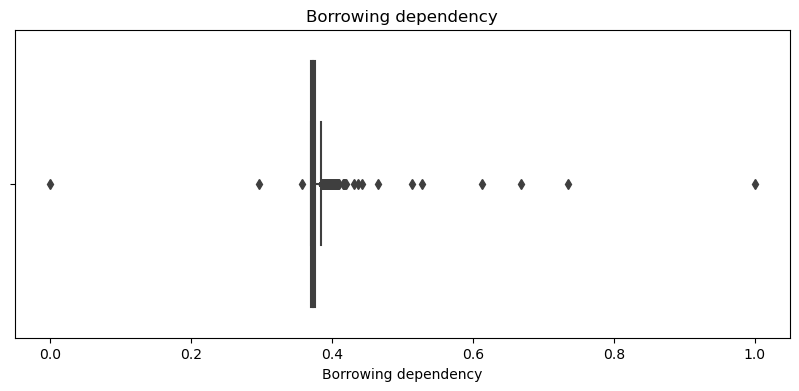

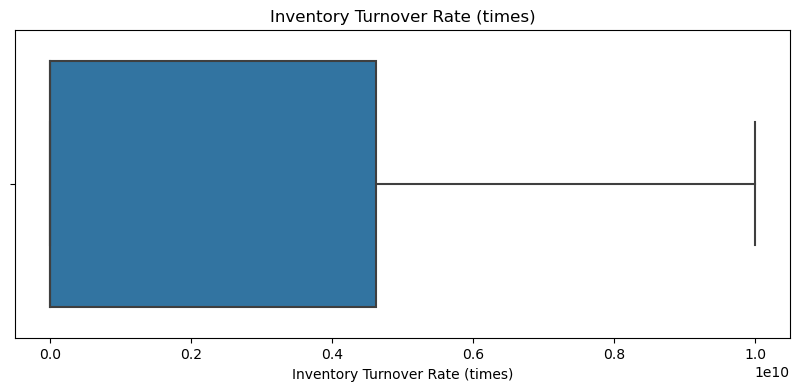

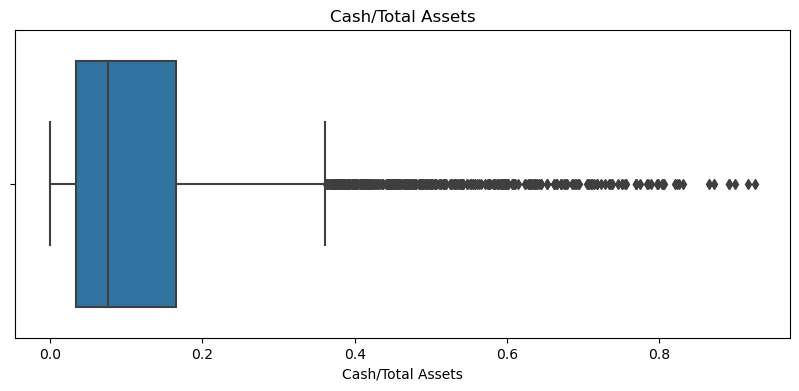

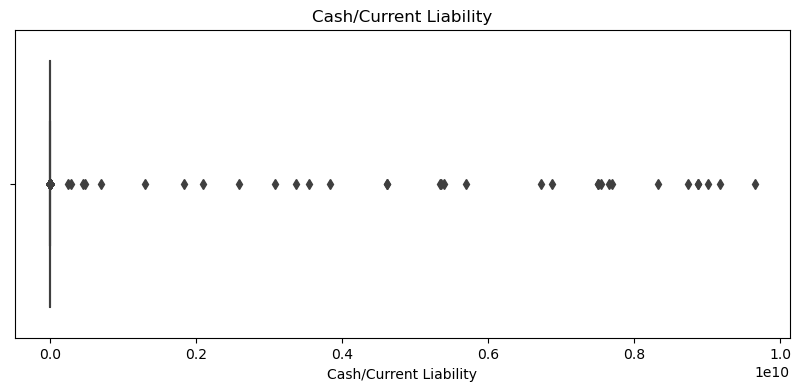

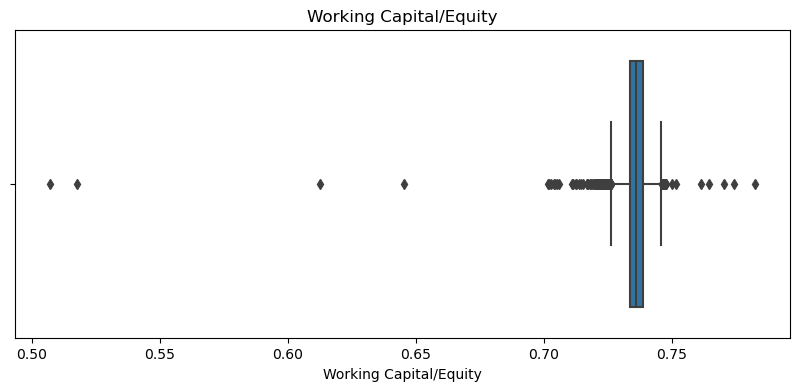

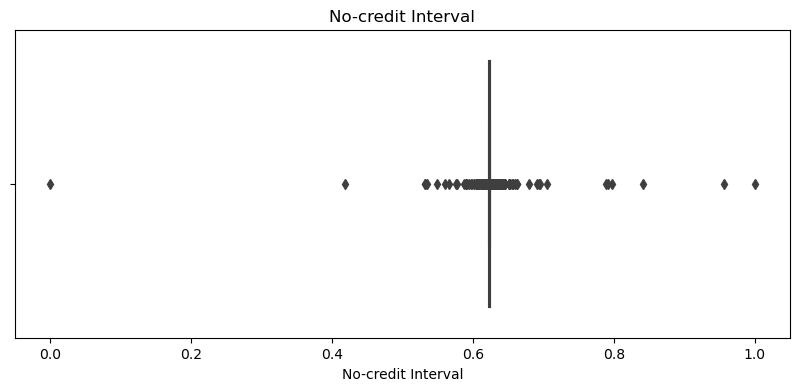

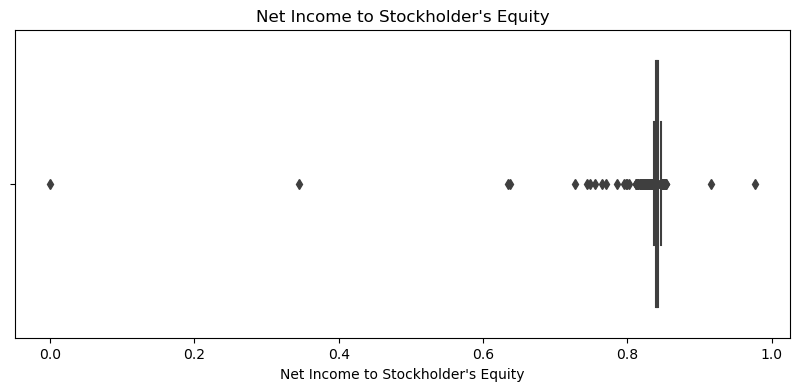

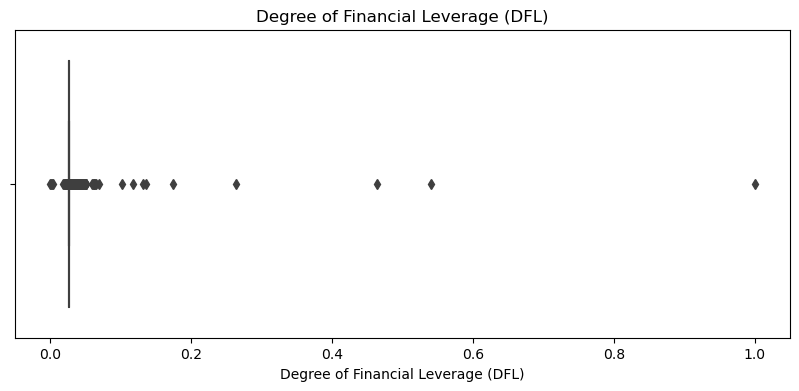

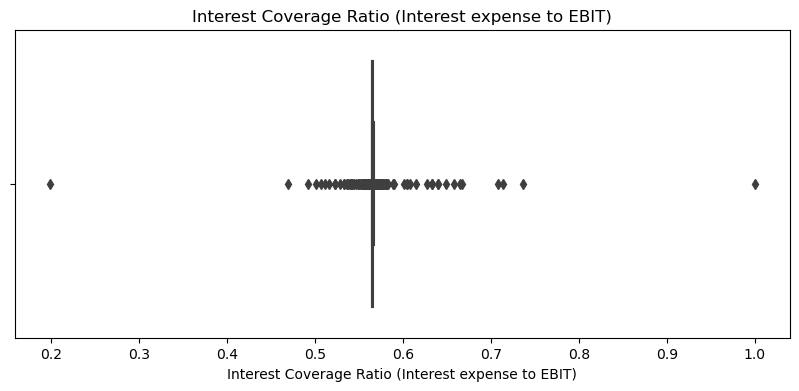

In [55]:
for column in train_x.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=train_x[column])
    plt.title(column)
    plt.show()

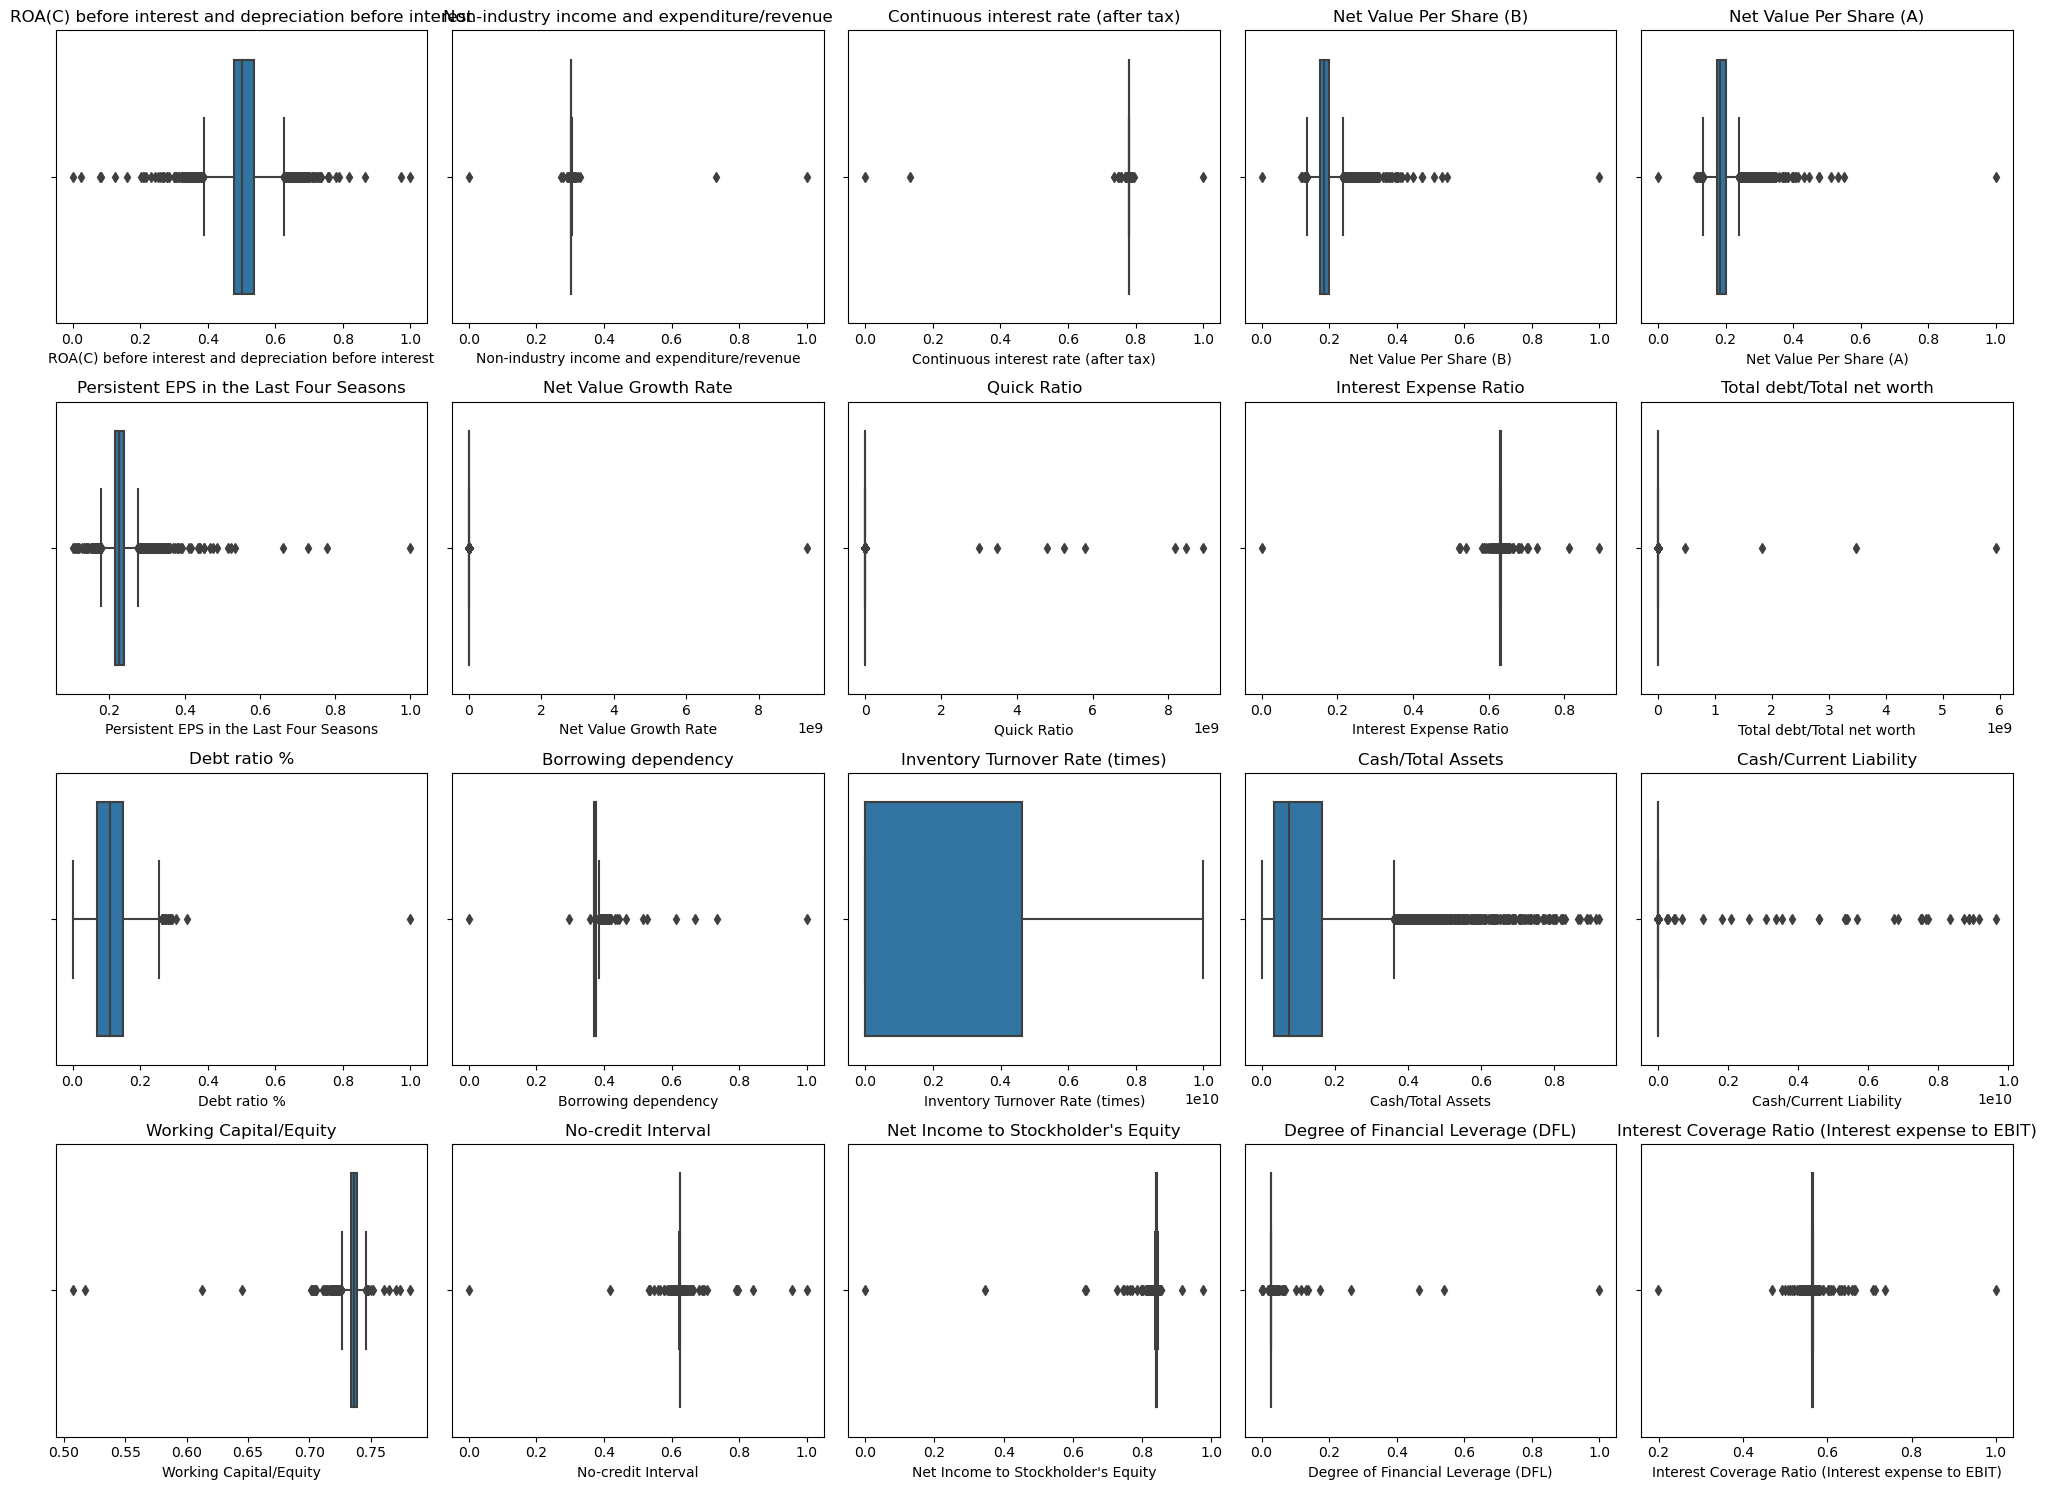

In [57]:
# 숫자형 열만 선택
numeric_columns = train_x.select_dtypes(include=['float64', 'int64']).columns

# 그리드 크기 설정 (20개의 그래프를 위해 4x5 그리드)
n_rows = 4
n_cols = 5

# 서브플롯 생성
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))

# 숫자형 열을 순회하며 박스플롯 생성
for i, column in enumerate(numeric_columns):
    row = i // n_cols
    col = i % n_cols
    sns.boxplot(x=train_x[column], ax=axes[row, col])
    axes[row, col].set_title(column)

# 레이아웃 조정 및 플롯 표시
plt.tight_layout()
plt.show()

In [58]:
# 숫자형 열만 선택
numeric_columns = train_x.select_dtypes(include=['float64', 'int64']).columns

def remove_outliers(df, column):
    # 제1사분위수와 제3사분위수 계산
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    # 사분위수 범위(IQR) 계산
    IQR = Q3 - Q1
    # 이상치 감지를 위한 하한값과 상한값 설정
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 이상치가 아닌 데이터만 필터링
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df

# 원본 데이터 복사
train_x_data = train_x.copy()

# 각 숫자형 열에 대해 함수 적용
for column in numeric_columns:
    train_x_data = remove_outliers(train_x_data, column)

In [59]:
train_x_data

,ROA(C) before interest and depreciation before interest,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Net Value Per Share (B),Net Value Per Share (A),Persistent EPS in the Last Four Seasons,Net Value Growth Rate,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Borrowing dependency,Inventory Turnover Rate (times),Cash/Total Assets,Cash/Current Liability,Working Capital/Equity,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT)
1,0.511724,0.303562,0.781745,0.180060,0.180060,0.229933,0.000472,0.007315,0.630925,0.008871,0.145811,0.377240,8.730000e+09,0.030548,0.002346,0.734898,0.623946,0.841964,0.026872,0.565518
3,0.512456,0.303500,0.781696,0.179259,0.179259,0.228798,0.000443,0.004021,0.631451,0.007501,0.133356,0.376712,5.520000e+09,0.078625,0.003636,0.733102,0.623373,0.841648,0.027090,0.566269
21,0.506069,0.303485,0.781612,0.183726,0.183726,0.226340,0.000467,0.008655,0.631124,0.006160,0.119056,0.373725,1.727300e-04,0.107938,0.005053,0.737979,0.624051,0.841299,0.026926,0.565729
23,0.566324,0.303454,0.781683,0.184232,0.184232,0.237686,0.000489,0.002359,0.631268,0.009279,0.149137,0.376458,6.630000e+09,0.022627,0.000970,0.730296,0.623648,0.842556,0.026977,0.565913
24,0.526447,0.303565,0.781657,0.174160,0.174160,0.225773,0.000483,0.010473,0.630612,0.003787,0.086495,0.370328,1.648960e-04,0.256574,0.016238,0.737505,0.623903,0.841581,0.026791,0.565158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,0.487691,0.303452,0.781590,0.172728,0.172728,0.217075,0.000438,0.006374,0.631804,0.007123,0.129576,0.376413,1.112045e-04,0.184365,0.008703,0.735034,0.623837,0.840417,0.027158,0.566457
4740,0.460001,0.303358,0.781534,0.185074,0.185074,0.212537,0.000416,0.008812,0.630434,0.001687,0.045953,0.369637,1.182742e-04,0.023678,0.002451,0.734319,0.623931,0.839599,0.026745,0.564930
4741,0.491737,0.303432,0.781587,0.192491,0.192491,0.220289,0.000464,0.008769,0.631987,0.007237,0.130725,0.373099,1.721568e-04,0.038294,0.001509,0.738414,0.623954,0.841718,0.027063,0.566188
4746,0.534344,0.303521,0.781598,0.222410,0.222410,0.254325,0.000482,0.008660,0.631048,0.009364,0.149832,0.369637,8.814199e-04,0.149154,0.005031,0.738332,0.624029,0.842766,0.026911,0.565670


변수 변환

In [13]:
# StandardScaler 인스턴스 생성
scaler = StandardScaler()

# cleaned_data에 표준 스케일링 적용
scaled_data_x = scaler.fit_transform(train_x)

scaled_data_x

array([[-0.48703966, -0.04577055, -0.15624625, ..., -0.08254471,
        -0.06130767, -0.18761317],
       [ 0.23619569, -0.01080342, -0.15624625, ...,  0.10197479,
        -0.04340503, -0.01119684],
       [ 3.40328765, -0.01282884, -0.15624625, ...,  0.36252275,
        -0.04789087, -0.04532976],
       ...,
       [-0.41828443, -0.01982227, -0.15624625, ...,  0.06086401,
        -0.03519737,  0.0401809 ],
       [ 2.0760507 , -0.01814079, -0.15624625, ...,  0.26519993,
        -0.04389431, -0.0146832 ],
       [-1.17024031, -0.02295593, -0.15624625, ..., -0.37741759,
        -0.0577138 , -0.14187043]])

In [14]:
train_x_scaled_df = pd.DataFrame(scaled_data_x, columns=train_x.columns)

In [15]:
train_x_scaled_df

,ROA(B) before interest and depreciation after tax,Non-industry income and expenditure/revenue,Interest-bearing debt interest rate,Net Value Per Share (B),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Net Value Growth Rate,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Net worth/Assets,Borrowing dependency,Inventory Turnover Rate (times),Cash/Total Assets,Cash/Current Liability,Working Capital/Equity,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT)
0,-0.487040,-0.045771,-0.156246,0.390927,0.389379,-0.484813,-0.014476,-0.03857,-0.178824,-0.023769,-0.406846,0.191658,1.123369,-0.484988,-0.071738,-0.630535,-0.057327,-0.082545,-0.061308,-0.187613
1,0.236196,-0.010803,-0.156246,-0.319505,-0.308541,0.013237,-0.014476,-0.03857,0.001846,-0.023769,-0.623664,0.185471,2.027940,-0.677579,-0.071738,-0.137658,-0.000877,0.101975,-0.043405,-0.011197
2,3.403288,-0.012829,-0.156246,0.172898,0.171814,1.468861,-0.014476,-0.03857,-0.026010,-0.023769,0.143365,-0.333820,-0.658082,1.031048,-0.071738,0.692125,0.013908,0.362523,-0.047891,-0.045330
3,0.257954,-0.015676,-0.156246,-0.342777,-0.342764,-0.019783,-0.014476,-0.03857,0.049136,-0.023769,-0.391641,0.149415,1.040296,-0.335383,-0.071738,-0.410562,-0.042126,0.081757,-0.031287,0.060730
4,0.826272,-0.005644,-0.156246,-0.377074,-0.376988,0.310415,-0.014476,-0.03857,-0.019923,-0.023769,-0.577485,-0.180355,-0.224257,-0.853167,-0.071738,0.954339,-0.080629,0.184274,-0.047623,-0.043145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4768,0.580842,-0.002033,-0.156246,0.902928,0.900291,1.102891,-0.014476,-0.03857,-0.009530,-0.023769,-1.063495,-0.185473,-0.658082,-0.469459,-0.071738,-0.133265,0.036112,0.205573,-0.045233,-0.024505
4769,0.009913,-0.014969,-0.156246,-0.418720,-0.418546,-0.226157,-0.014476,-0.03857,-0.010821,-0.023769,1.367684,-0.308306,2.104859,0.523527,-0.071738,0.967206,0.016834,0.040784,-0.044373,-0.018148
4770,-0.418284,-0.019822,-0.156246,1.004593,1.001740,0.142564,-0.014476,-0.03857,0.062326,-0.023769,-2.110981,0.590255,-0.470092,-0.632388,-0.071738,-0.170270,-0.391976,0.060864,-0.035197,0.040181
4771,2.076051,-0.018141,-0.156246,2.266221,2.260684,2.641064,-0.014476,-0.03857,-0.002304,-0.023769,-0.682233,0.253457,-0.658082,-0.141876,-0.071738,-0.099527,-0.025066,0.265200,-0.043894,-0.014683


오버샘플링

In [64]:
# train_x_data의 인덱스에 해당하는 train_y의 값만 선택
train_y_data = train_y.loc[train_x_data.index]

In [76]:
train_y['Bankrupt?'].value_counts()

0    4626
1     147
Name: Bankrupt?, dtype: int64

In [74]:
train_y_data

,Bankrupt?
1,0
3,0
21,0
23,0
24,0
...,...
4739,0
4740,0
4741,0
4746,0


In [73]:
train_y_data['Bankrupt?'].value_counts()

0    1296
1       1
Name: Bankrupt?, dtype: int64

In [16]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# SMOTE를 사용하여 오버샘플링
smote = SMOTE(random_state=42, k_neighbors=2)

# 오버샘플링을 적용하여 데이터를 재샘플링
X_resampled, y_resampled = smote.fit_resample(train_x, train_y)


### 3. EDA

In [17]:
X_resampled

,ROA(B) before interest and depreciation after tax,Non-industry income and expenditure/revenue,Interest-bearing debt interest rate,Net Value Per Share (B),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Net Value Growth Rate,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Net worth/Assets,Borrowing dependency,Inventory Turnover Rate (times),Cash/Total Assets,Cash/Current Liability,Working Capital/Equity,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT)
0,0.524439,0.303120,0.000314,0.204500,0.204500,0.212820,0.000420,0.003096,0.628912,0.007584,0.865828,0.377330,5.790000e+09,0.057606,0.002667,0.731654,0.623163,0.839083,0.026551,0.563676
1,0.568928,0.303562,0.000220,0.180060,0.180439,0.229933,0.000472,0.007315,0.630925,0.008871,0.854189,0.377240,8.730000e+09,0.030548,0.002346,0.734898,0.623946,0.841964,0.026872,0.565518
2,0.763745,0.303536,0.000000,0.197000,0.197000,0.279947,0.001441,0.009013,0.630614,0.005011,0.895365,0.369637,1.994802e-04,0.270602,0.013140,0.740359,0.624151,0.846032,0.026792,0.565162
3,0.570266,0.303500,0.000638,0.179259,0.179259,0.228798,0.000443,0.004021,0.631451,0.007501,0.866644,0.376712,5.520000e+09,0.078625,0.003636,0.733102,0.623373,0.841648,0.027090,0.566269
4,0.605225,0.303627,0.000183,0.178079,0.178079,0.240144,0.001686,0.000299,0.630682,0.008581,0.856668,0.371884,1.410000e+09,0.005879,0.000263,0.742085,0.622839,0.843249,0.026797,0.565184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9247,0.509371,0.303469,0.000312,0.172503,0.172503,0.209122,0.000436,0.004392,0.628894,0.016040,0.811177,0.382037,9.848642e+09,0.036125,0.001056,0.732736,0.623367,0.839034,0.026474,0.562999
9248,0.464492,0.303303,0.000421,0.170836,0.170836,0.169385,0.000367,0.004151,0.630011,0.025582,0.781268,0.391812,9.689667e+09,0.012932,0.000367,0.734487,0.623615,0.833422,0.026635,0.564283
9249,0.362622,0.303155,0.000352,0.159937,0.159937,0.186984,0.000368,0.006991,0.633386,0.005013,0.900187,0.373376,7.910000e+09,0.177680,0.014208,0.735257,0.623126,0.828310,0.029646,0.567199
9250,0.525577,0.303348,0.000641,0.163117,0.163117,0.197591,0.000405,0.003120,0.626835,0.024536,0.783696,0.389430,1.543070e-04,0.039554,0.001203,0.726180,0.623988,0.837216,0.026066,0.553170


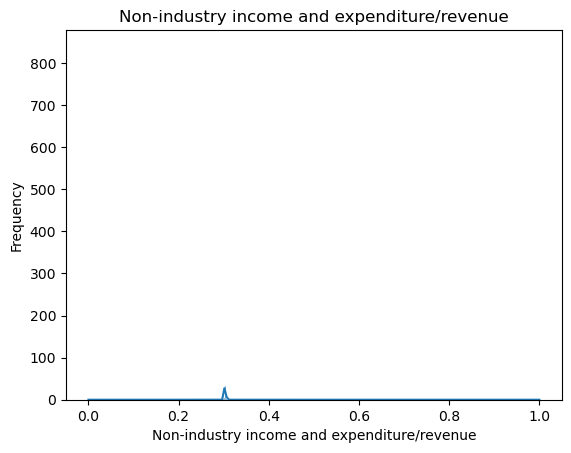

In [18]:
# 단변량 분석 예: 'Non-industry income and expenditure/revenue' 변수에 대한 히스토그램
sns.histplot(X_resampled['Non-industry income and expenditure/revenue'], kde=True)
plt.title('Non-industry income and expenditure/revenue')
plt.xlabel('Non-industry income and expenditure/revenue')
plt.ylabel('Frequency')
plt.show()

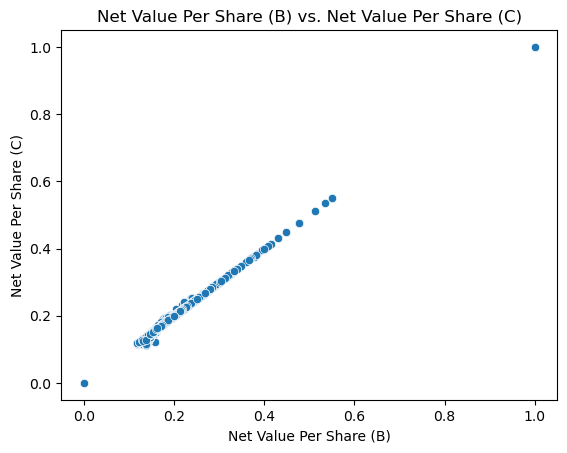

In [21]:
# 'Net Value Per Share (B)'와 'Net Value Per Share (C)' 변수 간의 산점도 그래프
sns.scatterplot(x='Net Value Per Share (B)', y='Net Value Per Share (C)', data=X_resampled)
plt.title('Net Value Per Share (B) vs. Net Value Per Share (C)')
plt.xlabel('Net Value Per Share (B)')
plt.ylabel('Net Value Per Share (C)')
plt.show()

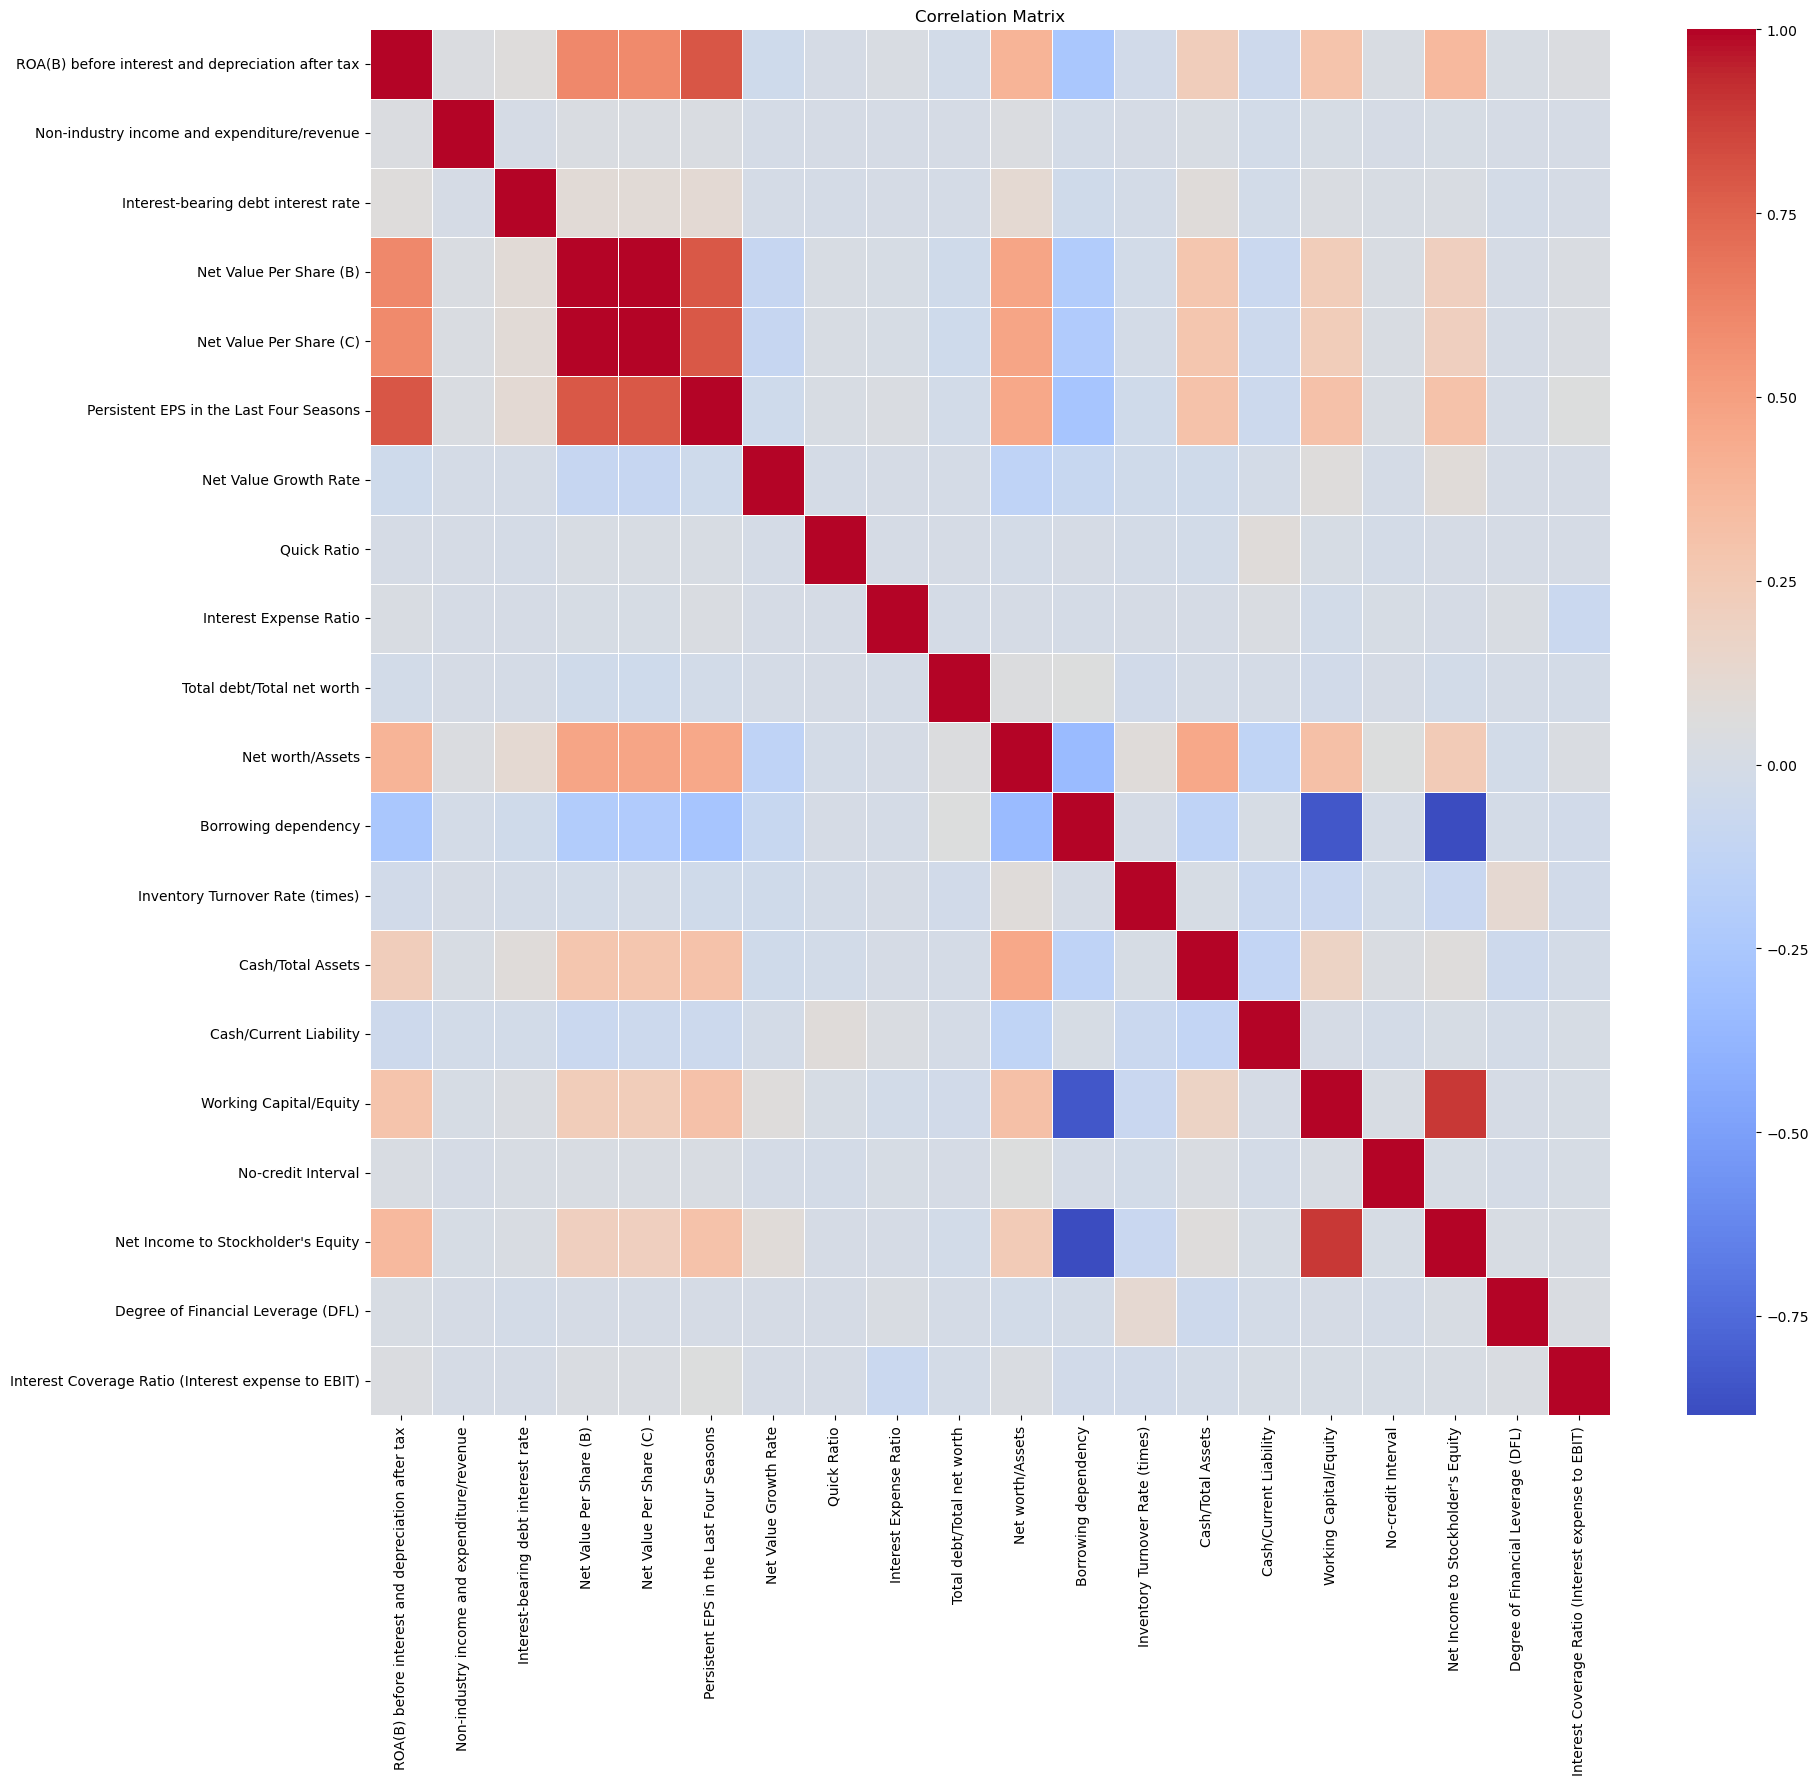

In [19]:
# 상관관계 행렬의 히트맵
correlation_matrix = X_resampled.corr()
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [23]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier()
}

In [34]:

# 모델별 성능 평가 결과 저장을 위한 딕셔너리
model_performance = {}

# 모델 학습 및 평가
for name, model in models.items():
    # 모델 학습
    model.fit(train_x, train_y)
    # 학습된 모델을 사용하여 예측
    predictions = model.predict(train_x)
    
    # 성능 지표 계산
    accuracy = accuracy_score(train_y, predictions)
    precision = precision_score(train_y, predictions, average='binary')
    recall = recall_score(train_y, predictions, average='binary')
    f1 = f1_score(train_y, predictions, average='binary')
    
    # 모델 이름과 성능 지표를 딕셔너리에 저장
    model_performance[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }
    
    # 성능 지표 출력
    print(f"{name}:")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}\n")

# 모든 모델의 성능 요약
print("Model performance summary:")
for name, metrics in model_performance.items():
    print(f"{name}:")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value:.4f}")
    print()


Logistic Regression:
Accuracy: 0.9617, Precision: 0.0909, Recall: 0.0272, F1-Score: 0.0419

Decision Tree:
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000

Random Forest:
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000

Support Vector Machine:
Accuracy: 0.9692, Precision: 0.0000, Recall: 0.0000, F1-Score: 0.0000

Naive Bayes:
Accuracy: 0.0727, Precision: 0.0317, Recall: 0.9864, F1-Score: 0.0615

KNN:
Accuracy: 0.9707, Precision: 0.7333, Recall: 0.0748, F1-Score: 0.1358

Model performance summary:
Logistic Regression:
Accuracy: 0.9617
Precision: 0.0909
Recall: 0.0272
F1-Score: 0.0419

Decision Tree:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000

Random Forest:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000

Support Vector Machine:
Accuracy: 0.9692
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000

Naive Bayes:
Accuracy: 0.0727
Precision: 0.0317
Recall: 0.9864
F1-Score: 0.0615

KNN:
Accuracy: 0.9707
Prec

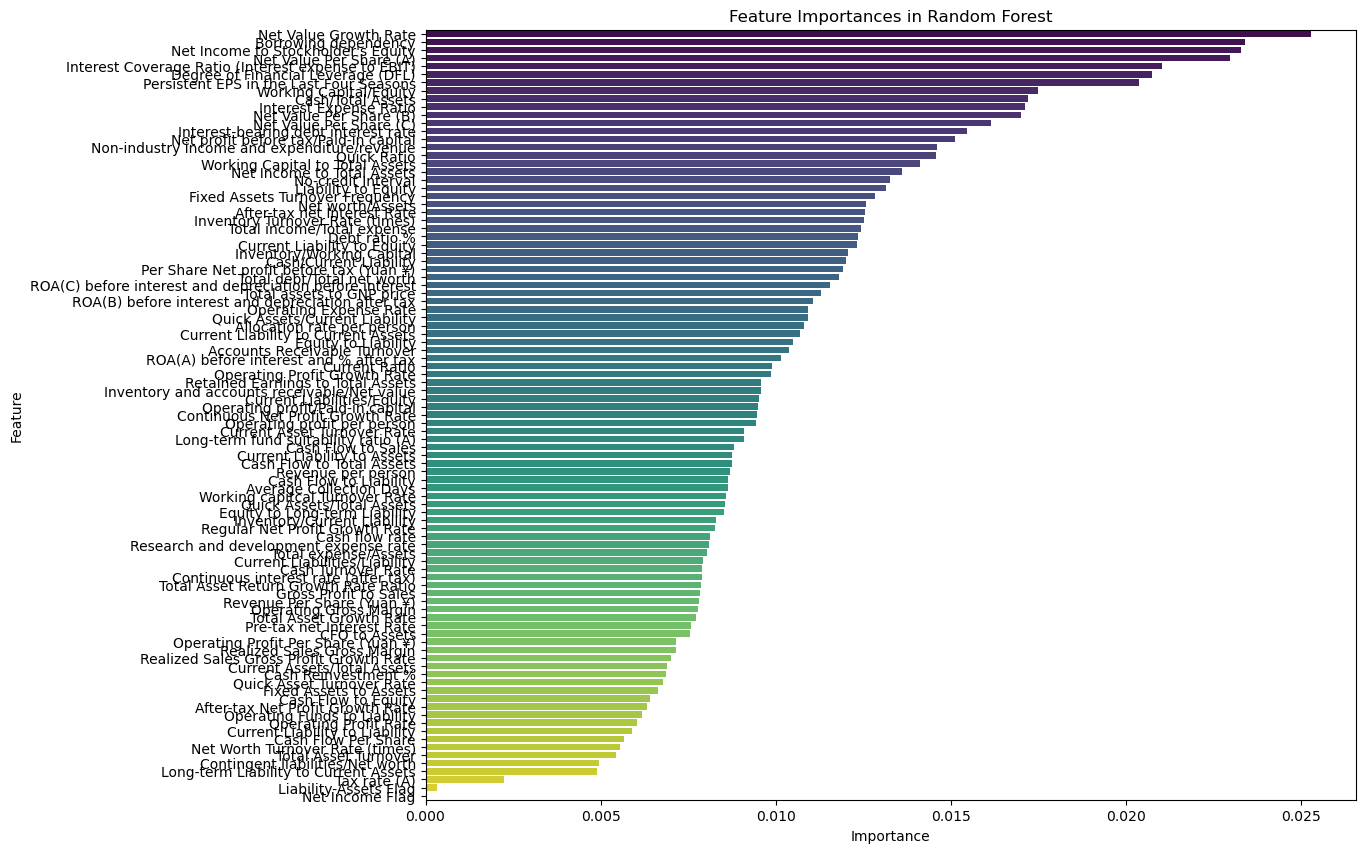

,Feature,Importance
29,Net Value Growth Rate,0.025298
39,Borrowing dependency,0.023409
89,Net Income to Stockholder's Equity,0.023301
16,Net Value Per Share (A),0.022978
92,Interest Coverage Ratio (Interest expense to E...,0.021029
...,...,...
40,Contingent liabilities/Net worth,0.004958
66,Long-term Liability to Current Assets,0.004900
14,Tax rate (A),0.002229
84,Liability-Assets Flag,0.000329


In [35]:
#랜덤 포레스트 분류기 초기화 및 훈련
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(train_x, train_y)

# 특성 중요도 추출
feature_importances = rf.feature_importances_
feature_names = train_x.columns

# 시각화를 위한 데이터프레임 생성
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# 중요도에 따라 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 피처 중요도 시각화
plt.figure(figsize=(12, 10))  # 그래프 크기 조정
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')  
plt.title('Feature Importances in Random Forest')
plt.show()

# 피처 중요도 데이터프레임 출력
feature_importance_df